EDA
-Data analysis
-visualization
-adding duration for each speach wav file


In [1]:
import pandas as pd
data = pd.read_csv("df_iemocap_transcript.csv")


In [2]:
data.head()

,session,method,gender,emotion,n_annotators,agreement,path,transcript
0,1,script,F,neu,3,3,Session1/sentences/wav/Ses01F_script02_1/Ses01...,Fine.\n
1,1,script,F,fru,3,2,Session1/sentences/wav/Ses01F_script02_1/Ses01...,[BREATHING]\n
2,1,script,F,xxx,0,0,Session1/sentences/wav/Ses01F_script02_1/Ses01...,What?\n
3,1,script,F,sur,3,2,Session1/sentences/wav/Ses01F_script02_1/Ses01...,What flashlight?\n
4,1,script,F,neu,3,2,Session1/sentences/wav/Ses01F_script02_1/Ses01...,That's not your flashlight.\n


In [3]:
data.columns

Index(['session', 'method', 'gender', 'emotion', 'n_annotators', 'agreement',
       'path', 'transcript'],
      dtype='object')

In [4]:
data['emotion'].value_counts()

xxx    2507
fru    1849
neu    1708
ang    1103
sad    1084
exc    1041
hap     595
sur     107
fea      40
oth       3
dis       2
Name: emotion, dtype: int64

In [5]:
# check data balance and remove the unbalanced data
#df[df.line_race != 0]
data = data[~data['emotion'].isin(['xxx','dis','oth','fea','sur','hap'])]

data['emotion'].value_counts()


fru    1849
neu    1708
ang    1103
sad    1084
exc    1041
Name: emotion, dtype: int64

In [6]:
#new data after removing unbalanced data
len(data)

6785

In [7]:
data = data.reset_index(drop=True)

len(data)

6785

In [8]:
data.isnull().values.any()

False

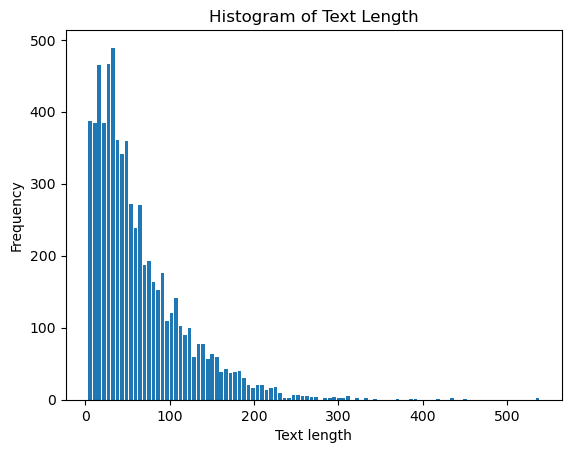

In [9]:
import matplotlib.pyplot as plt

# Assume your text data is stored in a list called `texts`
text_lengths = [len(text) for text in data['transcript']]

# Create a histogram with 10 bins
plt.hist(text_lengths, bins=100, rwidth=0.8, histtype='bar')

# Add labels and title
plt.xlabel("Text length")
plt.ylabel("Frequency")
plt.title("Histogram of Text Length")

# Display the plot
plt.show()

In [21]:
data['path'][3]

'Session1/sentences/wav/Ses01F_script02_1/Ses01F_script02_1_F006.wav'

In [24]:
import os
os.chdir("/Users/adham/Desktop/EMO_REC/IEMOCAP_full_release/Sessions")

In [30]:
data['duration']=0
data.head()

,session,method,gender,emotion,n_annotators,agreement,path,transcript,duration
0,1,script,F,neu,3,3,Session1/sentences/wav/Ses01F_script02_1/Ses01...,Fine.\n,0
1,1,script,F,fru,3,2,Session1/sentences/wav/Ses01F_script02_1/Ses01...,[BREATHING]\n,0
2,1,script,F,neu,3,2,Session1/sentences/wav/Ses01F_script02_1/Ses01...,That's not your flashlight.\n,0
3,1,script,F,ang,3,2,Session1/sentences/wav/Ses01F_script02_1/Ses01...,You keep saying my flashlight like it's just ...,0
4,1,script,F,ang,3,2,Session1/sentences/wav/Ses01F_script02_1/Ses01...,How's that supposed to make me feel?\n,0


In [31]:
import wave

# Open the .wav file
for i in range(len(data)):
    with wave.open(data['path'][i], 'r') as wav_file:
        #print(i)
        #Get the number of frames
        num_frames = wav_file.getnframes()
        # Get the frame rate (samples per second)
        frame_rate = wav_file.getframerate()
        # Calculate the duration of the audio in seconds
        duration = num_frames / float(frame_rate)
        data['duration'][i]=duration
        #print("Audio duration: {:.2f} seconds".format(duration))

/var/folders/ty/gwnmr_d57774fcnl_52r4y400000gn/T/ipykernel_1531/4101492060.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['duration'][i]=duration


In [32]:
data.head()

,session,method,gender,emotion,n_annotators,agreement,path,transcript,duration
0,1,script,F,neu,3,3,Session1/sentences/wav/Ses01F_script02_1/Ses01...,Fine.\n,2.070000
1,1,script,F,fru,3,2,Session1/sentences/wav/Ses01F_script02_1/Ses01...,[BREATHING]\n,1.502438
2,1,script,F,neu,3,2,Session1/sentences/wav/Ses01F_script02_1/Ses01...,That's not your flashlight.\n,2.180000
3,1,script,F,ang,3,2,Session1/sentences/wav/Ses01F_script02_1/Ses01...,You keep saying my flashlight like it's just ...,2.970000
4,1,script,F,ang,3,2,Session1/sentences/wav/Ses01F_script02_1/Ses01...,How's that supposed to make me feel?\n,1.819937


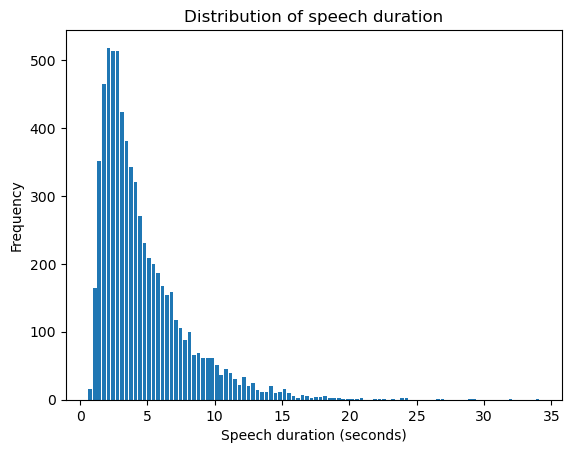

In [33]:
import matplotlib.pyplot as plt

# Assume your DataFrame is called 'df' and the speech duration column is called 'duration'
duration_values = data['duration'].values

# Create a histogram with 50 bins
plt.hist(duration_values, bins=100, rwidth=0.8, histtype='bar')

# Add labels and title
plt.xlabel('Speech duration (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of speech duration')

# Show the plot
plt.show()

In [34]:
data.head()

,session,method,gender,emotion,n_annotators,agreement,path,transcript,duration
0,1,script,F,neu,3,3,Session1/sentences/wav/Ses01F_script02_1/Ses01...,Fine.\n,2.070000
1,1,script,F,fru,3,2,Session1/sentences/wav/Ses01F_script02_1/Ses01...,[BREATHING]\n,1.502438
2,1,script,F,neu,3,2,Session1/sentences/wav/Ses01F_script02_1/Ses01...,That's not your flashlight.\n,2.180000
3,1,script,F,ang,3,2,Session1/sentences/wav/Ses01F_script02_1/Ses01...,You keep saying my flashlight like it's just ...,2.970000
4,1,script,F,ang,3,2,Session1/sentences/wav/Ses01F_script02_1/Ses01...,How's that supposed to make me feel?\n,1.819937


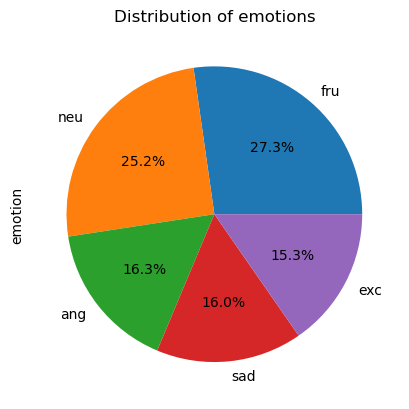

In [35]:
# Plot the distribution of emotions
data['emotion'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of emotions')
plt.show()

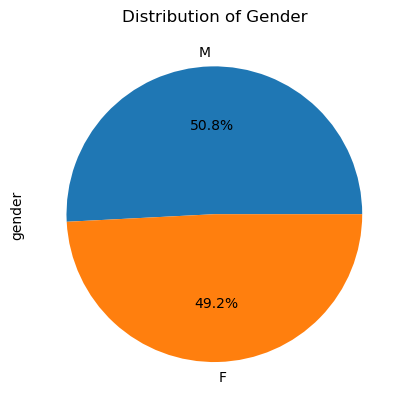

In [36]:
# Plot the distribution of Gender
data['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Gender')
plt.show()

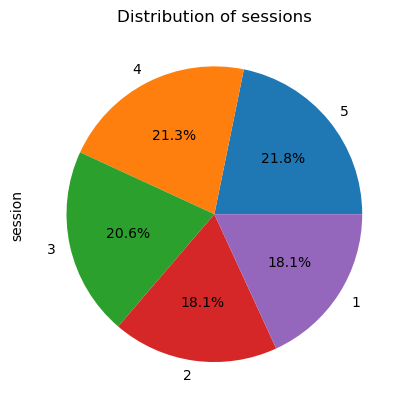

In [37]:
# Plot the distribution of Gender
data['session'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of sessions')
plt.show()

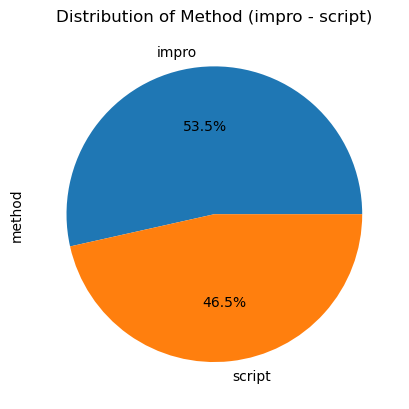

In [38]:
# Plot the distribution of Gender
data['method'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Method (impro - script)')
plt.show()

In [40]:
data.head()
print(len(data))

6785


In [ ]:
#save dataframe pandas as csv file

data.to_csv("Iemocap_clean_data.csv")
